In [ ]:
# CELL 1: Import Necessary Libraries and Settings
# =====================================================

# Install Gradio if necessary (Required for Colab)
!pip install gradio -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score

# Visualization Settings
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Hide warnings

print("Setup complete. Libraries ready.")

Setup complete. Libraries ready.


In [ ]:
# CELL 2: Load and Inspect Dataset
# =====================================================

# Define the path to your uploaded file
# IMPORTANT: If your file name is different, change it here.
file_path = 'Anemia_Dataset.xlsx'

# Try to read the Excel file into a pandas DataFrame
try:
    df = pd.read_excel(file_path)

    # Display the first 5 rows to check if data loaded correctly
    print("--- First 5 Rows of the Dataset ---")
    print(df.head())
    print("\n")

    # Display a concise summary of the dataframe
    print("--- Dataset Info (Column Types and Missing Values) ---")
    df.info()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found in the Colab session storage.")
    print("Please make sure you have uploaded the file and the name matches.")

--- First 5 Rows of the Dataset ---
  Gender  Age    Hb   RBC   PCV   MCV   MCH  MCHC  Decision_Class
0      f   32  10.9  4.26  34.2  80.2  25.5  31.8               1
1      f   45   9.6  3.64  29.9  82.1  26.4  32.2               1
2      f   38  10.1  3.70  32.4  87.6  27.4  31.3               1
3      m   37  11.0  3.93  33.6  85.3  27.9  32.7               1
4      f   50  12.1  4.16  36.5  87.9  29.2  33.2               0


--- Dataset Info (Column Types and Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1000 non-null   object 
 1   Age             1000 non-null   int64  
 2   Hb              1000 non-null   float64
 3   RBC             1000 non-null   float64
 4   PCV             1000 non-null   float64
 5   MCV             1000 non-null   float64
 6   MCH             1000 non-null   float64
 

In [ ]:
# CELL 3: Data Preprocessing
# =====================================================

# 1. Rename Target Variable
df_processed = df.copy()
df_processed = df_processed.rename(columns={'Decision_Class': 'Anemia'})

# 2. Encode Gender Data (Label Encoding)
# Female (f) -> 0, Male (m) -> 1
gender_map = {'f': 0, 'm': 1}
df_processed['Gender'] = df_processed['Gender'].map(gender_map)

print("--- Gender Distribution (0=Female, 1=Male) ---")
print(df_processed['Gender'].value_counts(normalize=True))
print("\n")

print("--- Descriptive Statistics of the Dataset ---")
# .T transposes the output to make it easier to read (columns as rows)
print(df_processed.describe().T)
print("\n")

print("--- Target Variable Distribution (Anemia) ---")
print(df_processed['Anemia'].value_counts(normalize=True))
print("\n")

print("--- Processed Dataset Info (Confirming Changes) ---")
print(df_processed.info())

--- Gender Distribution (0=Female, 1=Male) ---
Gender
0    0.672
1    0.328
Name: proportion, dtype: float64


--- Descriptive Statistics of the Dataset ---
         count      mean        std    min      25%    50%     75%     max
Gender  1000.0   0.32800   0.469720   0.00   0.0000   0.00   1.000    1.00
Age     1000.0  40.95600  16.019322  18.00  28.0000  38.00  51.250   96.00
Hb      1000.0  11.56840   1.336715   5.50  10.8000  11.60  12.200   15.80
RBC     1000.0   4.13381   0.599695   1.47   3.7675   4.11   4.460    7.41
PCV     1000.0  32.65240   4.857230  10.60  29.8000  32.80  35.625   49.50
MCV     1000.0  79.22000   7.775210  29.60  75.2000  80.70  84.425  104.90
MCH     1000.0  28.14340   3.340107  13.30  26.4000  28.70  30.400   37.90
MCHC    1000.0  35.42700   1.418162  25.30  34.9000  35.70  36.300   38.10
Anemia  1000.0   0.64100   0.479947   0.00   0.0000   1.00   1.000    1.00


--- Target Variable Distribution (Anemia) ---
Anemia
1    0.641
0    0.359
Name: proportion

In [ ]:
# CELL 4: Phase 1 - Baseline Modeling (All Variables Included)
# ==========================================================
# Goal: Measure model performance with the raw dataset.

# Prepare Data
X_full = df_processed.drop('Anemia', axis=1)
y = df_processed['Anemia']

# Train-Test Split (70% - 30%)
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=42)
print(f"Training Data Count: {X_train_full.shape[0]}")
print(f"Test Data Count:   {X_test_full.shape[0]}\n")

# Scaling
scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

# --- MODEL A: Logistic Regression ---
print("\n--- 1. Model: Logistic Regression ---")
log_model = LogisticRegression()
log_model.fit(X_train_full_scaled, y_train) # Train the model

# Make Predictions
y_pred_log = log_model.predict(X_test_full_scaled)

# Print Results
log_acc = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: %{log_acc*100:.2f}")
print(classification_report(y_test, y_pred_log))


# --- MODEL B: Random Forest Classifier ---
print("\n--- 2. Model: Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_full, y_train) # Train the model

# Make Predictions
y_pred_rf = rf_model.predict(X_test_full)

# Print Results
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy:       %{rf_acc*100:.2f}")
print(classification_report(y_test, y_pred_rf))

Training Data Count: 700
Test Data Count:   300


--- 1. Model: Logistic Regression ---
Logistic Regression Accuracy: %98.33
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       109
           1       0.98      0.99      0.99       191

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


--- 2. Model: Random Forest ---
Random Forest Accuracy:       %100.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       191

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



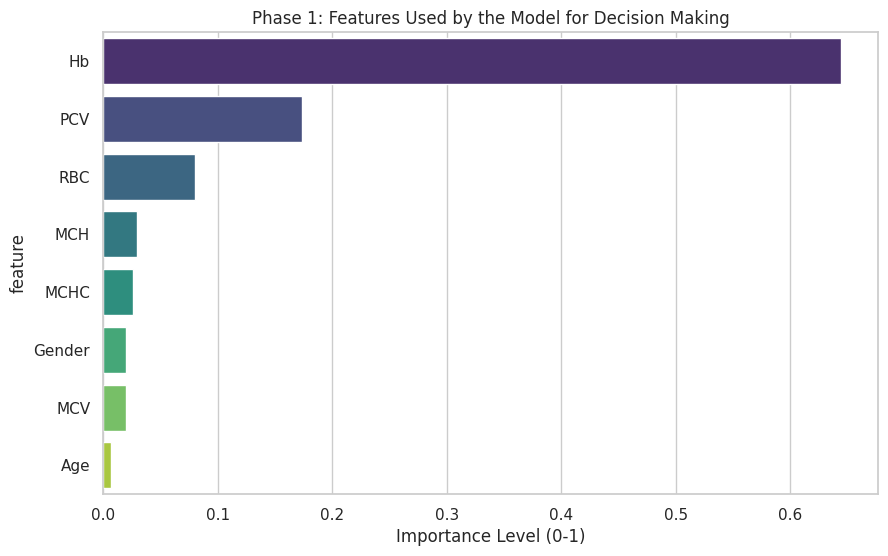

ANALYSIS RESULT:
Dominant feature: Hb (Importance: 0.64)
COMMENT: Hemoglobin (Hb) and PCV values are directly correlated with the target variable (Anemia).
This prevents the model from learning other biological factors.
Therefore, in Phase 2, we will remove these dominant features to test 'True Learning'.


In [ ]:
# CELL 5: Diagnosis - Why Did the Model Achieve 100% Success? (Data Leakage Analysis)
# =======================================================================
# Here we examine which column the model looks at to make a decision.
# If a single column has more than 50% impact, there is a "shortcut".

# Feature Importance Scores
importances = rf_model.feature_importances_
feature_names = X_full.columns
df_importance = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=df_importance, palette='viridis')
plt.title("Phase 1: Features Used by the Model for Decision Making")
plt.xlabel("Importance Level (0-1)")
plt.show()

print("ANALYSIS RESULT:")
print(f"Dominant feature: {df_importance.iloc[0]['feature']} (Importance: {df_importance.iloc[0]['importance']:.2f})")
print("COMMENT: Hemoglobin (Hb) and PCV values are directly correlated with the target variable (Anemia).")
print("This prevents the model from learning other biological factors.")
print("Therefore, in Phase 2, we will remove these dominant features to test 'True Learning'.")

In [ ]:
# CELL 6: Phase 2 - Multi-Model Comparison with Hardened Dataset
# ===========================================================================
# Removing Hb and PCV to test if the model can diagnose anemia
# using other blood values (MCV, MCH, etc.).

# 1. Remove "Cheating" (Dominant) columns
X_hard = df_processed.drop(['Anemia', 'Hb', 'PCV'], axis=1)
y = df_processed['Anemia']
print(f"--- Features Used: {X_hard.columns.tolist()} ---\n")

# 2. Split the New Dataset
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_hard, y, test_size=0.3, random_state=42)

# 3. Scaling (Required for models like SVM)
scaler_hard = StandardScaler()
X_train_h_scaled = scaler_hard.fit_transform(X_train_h)
X_test_h_scaled = scaler_hard.transform(X_test_h)

# 4. Models to Test
models = {
    "Random Forest (No Hb)": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Linear)": SVC(kernel='linear', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

print("="*40)
print("--- MODEL PERFORMANCE COMPARISON ---")
print("="*40)

# 5. Loop for Training and Testing
for name, model in models.items():
    # Train Model
    model.fit(X_train_h_scaled, y_train_h)

    # Make Prediction
    y_pred = model.predict(X_test_h_scaled)

    # Calculate Scores
    acc = accuracy_score(y_test_h, y_pred)
    recall = recall_score(y_test_h, y_pred) # Hastaları yakalama başarısı
    f1 = f1_score(y_test_h, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Recall": recall,
        "F1-Score": f1
    })

    print(f"✅ {name} -> Accuracy: %{acc*100:.2f}, Recall: %{recall*100:.2f}, F1-Score: %{f1*100:.2f}")

# Save Results
df_results = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
best_model_name = df_results.iloc[0]['Model']
best_model = models[best_model_name] # Select Best Model

print("\n--- FINAL SCORE TABLE ---")
print(df_results)
print("\n")

--- Features Used: ['Gender', 'Age', 'RBC', 'MCV', 'MCH', 'MCHC'] ---

--- MODEL PERFORMANCE COMPARISON ---
✅ Random Forest (No Hb) -> Accuracy: %90.00, Recall: %91.10, F1-Score: %92.06
✅ SVM (Linear) -> Accuracy: %84.33, Recall: %90.58, F1-Score: %88.04
✅ Gradient Boosting -> Accuracy: %88.00, Recall: %92.15, F1-Score: %90.72

--- FINAL SCORE TABLE ---
                   Model  Accuracy    Recall  F1-Score
0  Random Forest (No Hb)  0.900000  0.910995  0.920635
2      Gradient Boosting  0.880000  0.921466  0.907216
1           SVM (Linear)  0.843333  0.905759  0.880407




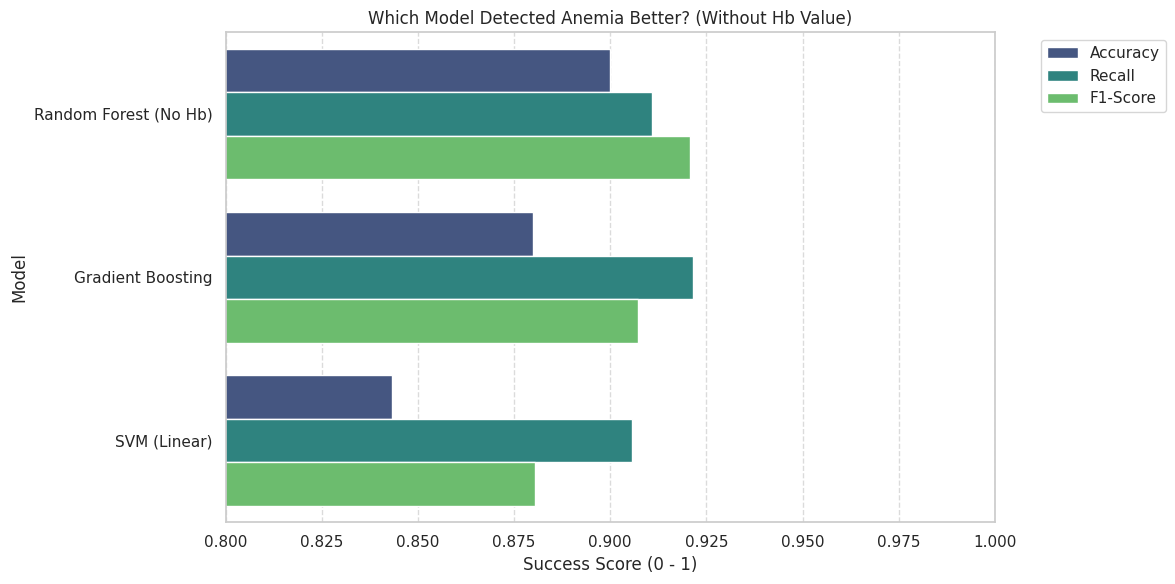


🏆 WINNING MODEL: Random Forest (No Hb)


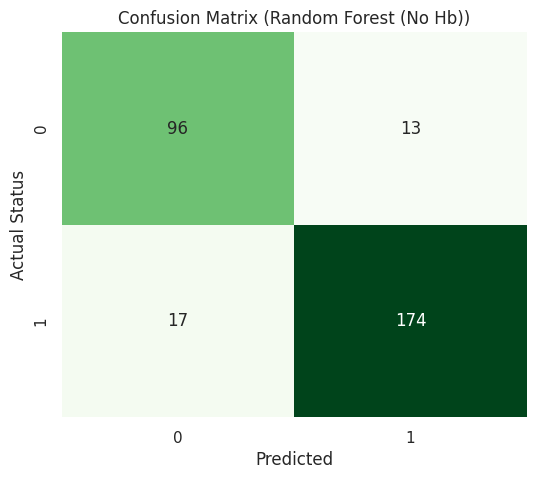

In [ ]:
# CELL 7: Performance Visualization and Confusion Matrix
# ====================================================

# 2. Plot Comparison Graph
plt.figure(figsize=(12, 6))

# Melting the table for plotting
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Bar plot
sns.barplot(x="Score", y="Model", hue="Metric", data=df_melted, palette="viridis")

plt.title("Which Model Detected Anemia Better? (Without Hb Value)")
plt.xlabel("Success Score (0 - 1)")
plt.xlim(0.8, 1.0) # Zooming in to see differences more clearly
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout()
plt.show()

# 2. Confusion Matrix of the Winning Model
print(f"\n🏆 WINNING MODEL: {best_model_name}")
y_pred_best = best_model.predict(X_test_h_scaled)

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test_h, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f'Confusion Matrix ({best_model_name})')
plt.xlabel('Predicted')
plt.ylabel('Actual Status')
plt.show()

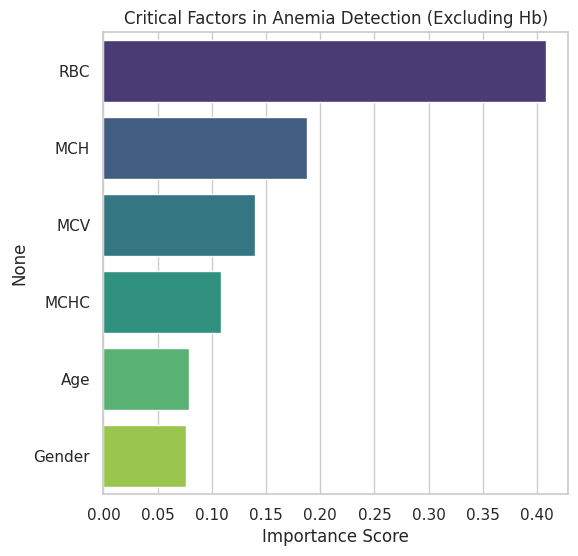

In [ ]:
# CELL 8: Feature Importance (Without Hb)
# ====================================================

# 2. Which Feature Is More Important?
# We analyze the feature importance of the winning model (best_model)
new_importances = pd.Series(best_model.feature_importances_, index=X_hard.columns).sort_values(ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x=new_importances, y=new_importances.index, palette='viridis')
plt.title('Critical Factors in Anemia Detection (Excluding Hb)')
plt.xlabel('Importance Score')
plt.show()

In [ ]:
# CELL 9: Step 7: Interface
# =============================================================================

import numpy as np
import gradio as gr

def predict_anemia_hard(gender, age, rbc, mcv, mch, mchc):
    """
    This function takes input from the interface (without Hb and PCV).
    """

    # 1. Encode Gender
    gender_code = 0 if gender == "Female" else 1

    # 2. Convert to numpy array (Order: Gender, Age, RBC, MCV, MCH, MCHC)
    raw_data = np.array([[gender_code, age, rbc, mcv, mch, mchc]])

    # 3. Scaling
    try:
        data_scaled = scaler_hard.transform(raw_data)
    except NameError:
        return "ERROR: 'scaler_hard' not found. Please run Cell 6 first."
    except ValueError:
        return "ERROR: Column count mismatch."

    # 4. Make Prediction (Using Best Model)
    prediction = best_model.predict(data_scaled)

    # Get Probability (If supported)
    try:
        probability = best_model.predict_proba(data_scaled)[0][1]
        percent_str = f"({probability*100:.1f}%)"
    except:
        percent_str = "" # SVM might not provide probability

    # 5. Generate Message
    if prediction[0] == 1:
        return f"⚠️ HIGH RISK: Anemia Suspected {percent_str}\n(Model Used: {best_model_name})"
    else:
        return f"✅ NORMAL: Values Look Healthy {percent_str}\n(Model Used: {best_model_name})"

# --- REAL DATA FOR PRESENTATION (TAKEN FROM DATASET) ---
# Format: [Gender, Age, RBC, MCV, MCH, MCHC]
sample_data = [
    # --- 5 REAL ANEMIC PATIENTS (Decision_Class: 1) ---
    ['Female', 56, 3.83, 68.8, 22.9, 33.3],
    ['Female', 34, 2.53, 71.1, 25.6, 36.0],
    ['Female', 24, 4.03, 73.7, 26.4, 35.8],
    ['Female', 50, 4.44, 73.3, 25.4, 34.7],
    ['Female', 23, 3.90, 82.6, 28.8, 34.9],

    # --- 5 REAL HEALTHY INDIVIDUALS (Decision_Class: 0) ---
    ['Male', 36, 5.06, 72.5, 25.6, 35.3],
    ['Female', 25, 4.10, 84.0, 29.7, 35.4],
    ['Male', 28, 5.12, 79.5, 27.9, 35.1],
    ['Male', 45, 4.73, 89.4, 32.3, 36.1],
    ['Female', 34, 4.52, 73.4, 26.7, 36.4]
]

# Interface Components
interface = gr.Interface(
    fn=predict_anemia_hard,
    inputs=[
        gr.Radio(["Female", "Male"], label="Gender"),
        gr.Slider(18, 100, label="Age"),
        gr.Slider(1.0, 8.0, label="RBC (Red Blood Cell)"),
        gr.Slider(50.0, 110.0, label="MCV"),
        gr.Slider(15.0, 40.0, label="MCH"),
        gr.Slider(20.0, 45.0, label="MCHC")
    ],
    outputs=gr.Textbox(label="Model Decision", lines=3),
    title=f"🩸 Anemia Prediction System (Final Presentation)",
    description=f"Predicts based on cell features without looking at Hb and PCV values.\n\n👇 **Click on the examples below for the presentation:**",

    examples=sample_data,
    cache_examples=False
)

# Launch
interface.launch(share=True, debug=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3815bba7b34795a545.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
